In [1]:
from keras.datasets import mnist
# 只能是相对路径，放在(~/.keras/datasets)目录下
(x_train, y_train), (x_test, y_test) = mnist.load_data('mnist.npz')

Using TensorFlow backend.
/Users/po/Documents/repo/venv/py3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/po/Documents/repo/venv/py3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/po/Documents/repo/venv/py3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/po/Documents/rep

In [3]:
print(x_train.shape, type(x_train))
print(y_train.shape, type(y_train))

(60000, 28, 28) <class 'numpy.ndarray'>
(60000,) <class 'numpy.ndarray'>


In [2]:
# 数据处理，将图像数据从[28,28][784,]
X_train = x_train.reshape(60000, 784)
X_test = x_test.reshape(10000, 784)

print(X_train.shape, type(X_train))
print(X_test.shape, type(X_test))

(60000, 784) <class 'numpy.ndarray'>
(10000, 784) <class 'numpy.ndarray'>


In [3]:
# 将数据类型转换为float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# 数据归一化
X_train /= 255
X_test /= 255

In [14]:
# 统计训练数据中各标签数量
import numpy as np
import matplotlib.pyplot as plt

label, count = np.unique(y_train, return_counts=True)
print(label, count)

[0 1 2 3 4 5 6 7 8 9] [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


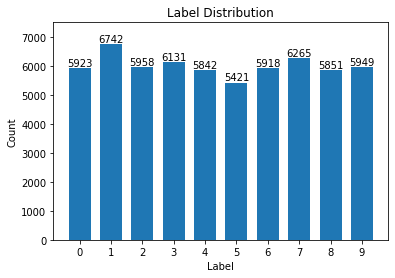

In [9]:
fig = plt.figure()
plt.bar(label, count, width = 0.7, align = 'center')
plt.title("Label Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(label)
plt.ylim(0, 7500)

for a, b in zip(label, count):
    plt.text(a, b, '%d' % b, ha='center', va='bottom', fontsize=10)
    
plt.show()

#### 数据处理：one-hot编码

几种编码方式的对比

<img width=30% height=30% src="imgs/08/01.png" alt="imgs/08/01.png" title="图1" />

one-hot应用

<img width=70% height=70% src="imgs/08/02.png" alt="imgs/08/02.png" title="图2" />

In [4]:
from keras.utils import np_utils

n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)
Y_test = np_utils.to_categorical(y_test, n_classes)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [13]:
print(y_train[0])
print(Y_train[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


#### 使用 Keras sequential model 定义神经网络

softmax 网络层

<img width=70% height=70% src="imgs/08/03.png" alt="imgs/08/03.png" title="图3" />

In [5]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation

model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))

model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

#### 编译模型

[1]:https://keras.io/models/model/#compile

[model.compile()][1]

```
compile(optimizer, loss=None, metrics=None, loss_weights=None, sample_weight_mode=None, weighted_metrics=None, target_tensors=None)
```

In [6]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

#### 训练模型，并将指标保存到history中

[2]:https://keras.io/models/model/#fit

[model.fit()][2]

```
fit(x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_freq=1, max_queue_size=10, workers=1, use_multiprocessing=False)
```

In [7]:
history = model.fit(X_train, Y_train, batch_size=128, epochs=5, verbose=2, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
 - 3s - loss: 0.2188 - acc: 0.9374 - val_loss: 0.0995 - val_acc: 0.9678
Epoch 2/5
 - 3s - loss: 0.0793 - acc: 0.9753 - val_loss: 0.0812 - val_acc: 0.9734
Epoch 3/5
 - 3s - loss: 0.0510 - acc: 0.9843 - val_loss: 0.0752 - val_acc: 0.9769
Epoch 4/5
 - 3s - loss: 0.0360 - acc: 0.9888 - val_loss: 0.0658 - val_acc: 0.9795
Epoch 5/5
 - 3s - loss: 0.0260 - acc: 0.9916 - val_loss: 0.0758 - val_acc: 0.9774


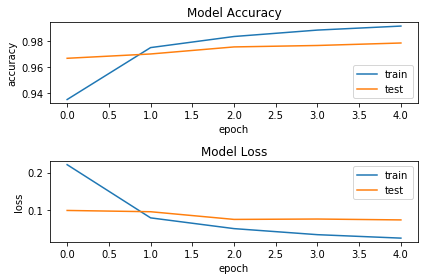

In [11]:
# 可视化指标

fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()

plt.show()

#### 保存模型

[3]:https://keras.io/getting-started/faq/#how-can-i-install-HDF5-or-h5py-to-save-my-models-in-Keras

[model.save()][3]

```
You can use model.save(filepath) to save a Keras model into a single HDF5 file which will contain:

- the architecture of the model, allowing to re-create the model
- the weights of the model
- the training configuration (loss, optimizer)
- the state of the optimizer, allowing to resume training exactly where you left off.

You can then use keras.models.load_model(filepath) to reinstantiate your model. load_model will also take care of compiling the model using the saved training configuration (unless the model was never compiled in the first place).
```



In [9]:
# save model
import os
import tensorflow.gfile as gfile

save_dir = './models/mnist'

if gfile.Exists(save_dir):
    gfile.DeleteRecursively(save_dir)
gfile.MakeDirs(save_dir)

model_name = 'keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' %model_path)

Saved trained model at ./models/mnist/keras_mnist.h5 


#### 加载模型

In [10]:
from keras.models import load_model
mnist_model = load_model(model_path)

#### 统计模型在测试集上的分类结果

In [16]:
loss_and_metrics = mnist_model.evaluate(X_test, Y_test, verbose=2)

print("Test Loss: {}".format(loss_and_metrics[0]))
print("Test Accuracy: {}%".format(loss_and_metrics[1]*100))

predicted_classes = mnist_model.predict_classes(X_test)

correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print("Classified correctly count: {}".format(len(correct_indices)))
print("Classified incorrectly count: {}".format(len(incorrect_indices)))

Test Loss: 0.07576945811733604
Test Accuracy: 97.74000000000001%
Classified correctly count: 9774
Classified incorrectly count: 226


#### 绘制错误手写体数字

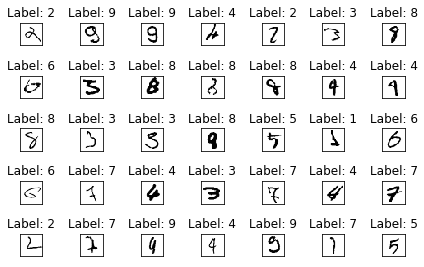

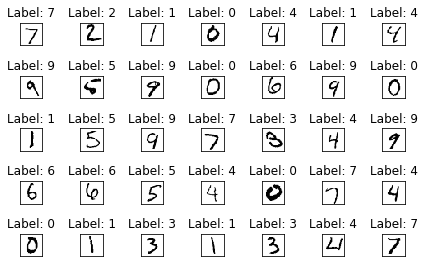

In [29]:
import matplotlib.pyplot as plt

# incorrect predicted mnist
fig = plt.figure()
for i in range(35):
    plt.subplot(5, 7, i+1) # 绘制前20个手写体数字，4行5列展示
    plt.tight_layout() # 自动适配子图尺寸
    plt.imshow(x_test[incorrect_indices[i]], cmap='Greys') # 使用灰色显示像素灰度值
    plt.title("Label: {}".format(y_test[incorrect_indices[i]])) # 设置标签为子图标题
    plt.xticks([]) # 删除x轴标记
    plt.yticks([]) # 删除y轴标记
    
# correct predicted mnist
fig1 = plt.figure()
for j in range(35):
    plt.subplot(5, 7, j+1) # 绘制前20个手写体数字，4行5列展示
    plt.tight_layout() # 自动适配子图尺寸
    plt.imshow(x_test[correct_indices[j]], cmap='Greys') # 使用灰色显示像素灰度值
    plt.title("Label: {}".format(y_test[correct_indices[j]])) # 设置标签为子图标题
    plt.xticks([]) # 删除x轴标记
    plt.yticks([]) # 删除y轴标记
